In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [30]:
img=cv2.imread('Jabba.jpg')

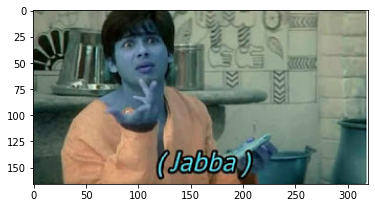

In [32]:
plt.imshow(img)

In [3]:
# In the first Line 0 is for the system camera to use. If written 1 then for external camera from the system
caputure = cv2.VideoCapture(0)

# This is for the different files to use from the Cascasde Folder, checkout various things to use.
haar_data = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')


In [229]:
caputure=cv2.VideoCapture(0)
haar_data = cv2.CascadeClassifier('./opencv/haarcascades/haarcascade_frontalface_default.xml')
data_withMask=[]

while True:
    flag, img=caputure.read()
    if flag:
        faces = haar_data.detectMultiScale(img)
        for x,y,w,h in faces:
            # 4 is for the border of the rectangle and rest is the dimensions it is taking of width, height, x and y
            cv2.rectangle(img, (x,y), (x+w, y+h), (0,0,255),4)
            face=img[y:y+h, x:x+w,:]
            
            # 50,50 is the dimention which we are setting for the width and height for all images
            face=cv2.resize(face, (50,50))
            print(len(data_withMask))

            # Here we are saving the numpy in data_withMask, basically 200 images hai kuch jo hum array ke form mein save ker rhe hai.Think of it as Data of Images.
            if len(data_withMask) < 200:
                data_withMask.append(face)
            
        cv2.imshow('result', img)
        # This 2 and 27 is that when we press Escape, the camera will stop working in the window, To indicate that we need to stop the Press
        if cv2.waitKey(2)==27 or len(data_withMask) >= 200:
            break

caputure.release()
cv2.destroyAllWindows()

In [228]:
caputure = cv2.VideoCapture(0)
haar_data = cv2.CascadeClassifier(
    './opencv/haarcascades/haarcascade_frontalface_default.xml')

data_withoutMask = []


while True:
    flag, img=caputure.read()
    if flag:
        faces = haar_data.detectMultiScale(img)
        for x,y,w,h in faces:
            cv2.rectangle(img, (x,y), (x+w, y+h), (0,0,255),4)
            face=img[y:y+h, x:x+w,:]
            face=cv2.resize(face, (50,50))
            print(len(data_withoutMask))

            if len(data_withoutMask) <200:
                data_withoutMask.append(face)
            
        cv2.imshow('result', img)
        if cv2.waitKey(2)==27 or len(data_withoutMask) >= 200:
            break

caputure.release()
cv2.destroyAllWindows()

In [75]:
# We are saving the data of images, by creatinga numpy file 
np.save('without_mask.npy',data_withoutMask)
np.save('with_mask.npy', data_withMask)

10


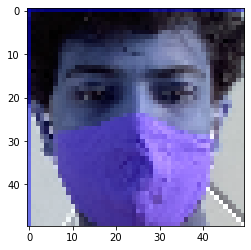

11


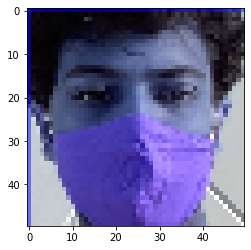

12


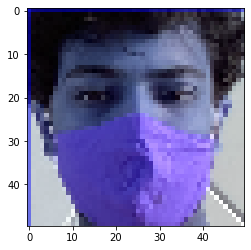

13


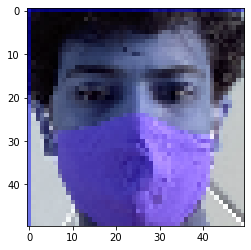

14


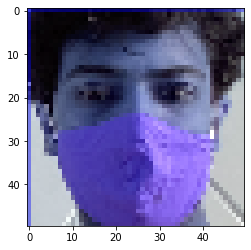

In [230]:
# Here are the images
for i in range(10,15):
    plt.imshow(data_withMask[i])
    print(i)
    plt.show()


In [3]:
# Loading  the Data of Images
with_Mask=np.load('with_mask.npy')

without_Mask=np.load('without_mask.npy')

In [4]:
# 200 is the number of images, 50,50 is the width and height, 3 is means it is a coloured image

with_Mask.shape, without_Mask.shape

((200, 50, 50, 3), (200, 50, 50, 3))

#### Both of them are in 3-D, will convert them into 2-D images

In [5]:
with_Mask=with_Mask.reshape(200,50*50*3)
without_Mask=without_Mask.reshape(200,50*50*3)

In [6]:
with_Mask.shape, without_Mask.shape

((200, 7500), (200, 7500))

#### Now we will combine both the with_Mask and without_Mask Data

In [7]:
#np.r_ is used to concantenate the Data
X=np.r_[with_Mask, without_Mask]

In [8]:
# We have combined the Images the total has become 400 images
X.shape

(400, 7500)

#### Labelling the Data in 1 and 0

In [9]:
# Labelled all the images 0 
labels=np.zeros(X.shape[0])

In [10]:
# Labelling the last  200 images as 1 i.e from 201-400 is 1
labels[200:]=1.0

In [11]:
y = labels
labels[299], labels[10]

(1.0, 0.0)

## Model Creation

In [12]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

In [13]:
X_train, X_test, y_train, y_test=train_test_split(X,y, test_size=0.25)

In [14]:
pca=PCA(n_components=3)
X_train=pca.fit_transform(X_train)

pca = PCA(n_components=3)
X_test = pca.fit_transform(X_test)

X_train.shape, X_test.shape


In [16]:
names={1:'No Mask', 0:'Mask'}

In [17]:
svm=SVC()
svm.fit(X_train, y_train)
prediction=svm.predict(X_test)

In [26]:
from sklearn.ensemble import RandomForestClassifier

forest=RandomForestClassifier()
forest.fit(X_train, y_train)
predictionForest=forest.predict(X_test)

In [30]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import cross_val_score


print(confusion_matrix(y_test, predictionForest))
print(accuracy_score(y_test, predictionForest))
print(classification_report(y_test, predictionForest))
print()

[[49  1]
 [ 1 49]]
0.98
              precision    recall  f1-score   support

         0.0       0.98      0.98      0.98        50
         1.0       0.98      0.98      0.98        50

    accuracy                           0.98       100
   macro avg       0.98      0.98      0.98       100
weighted avg       0.98      0.98      0.98       100




In [36]:
caputure = cv2.VideoCapture(0)
haar_data = cv2.CascadeClassifier(
    './opencv/haarcascades/haarcascade_frontalface_default.xml')

font = cv2.FONT_HERSHEY_COMPLEX


while True:
    flag, img = caputure.read()
    if flag:
        faces = haar_data.detectMultiScale(img)
        for x, y, w, h in faces:
            cv2.rectangle(img, (x, y), (x+w, y+h), (0, 0, 255), 4)
            face = img[y:y+h, x:x+w, :]
            face = cv2.resize(face, (50, 50))

            face = face.reshape(1, -1)
            face = pca.transform(face)
            pred = svm.predict(face)
            n = names[int(pred)]
            cv2.putText(img, n, (x, y), font, 1, (244, 250, 250), 2)

            cv2.putText(img,
                        'Mask Detection Application',(50, 50),font, 1,(255, 0, 0),2,cv2.LINE_4)
            print(n)

    

            cv2.imshow('result', img)
        if cv2.waitKey(2) == 27:
            break

caputure.release()
cv2.destroyAllWindows()



No Mask
Mask
Mask
No Mask
Mask
No Mask
Mask
Mask
Mask
Mask
Mask
Mask
No Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
No Mask
No Mask
No Mask
Mask
No Mask
No Mask
Mask
No Mask
Mask
No Mask
Mask
Mask
Mask
Mask
Mask
Mask
No Mask
Mask
Mask
Mask
Mask
No Mask
Mask
No Mask
Mask
No Mask
Mask
No Mask
No Mask
Mask
No Mask
Mask
No Mask
Mask
No Mask
Mask
Mask
No Mask
Mask
Mask
Mask
Mask
Mask
No Mask
Mask
Mask
No Mask
Mask
Mask
No Mask
Mask
No Mask
Mask
No Mask
Mask
Mask
No Mask
Mask
No Mask
No Mask
Mask
No Mask
Mask
No Mask
Mask
No Mask
Mask
No Mask
Mask
No Mask
Mask
Mask
No Mask
No Mask
Mask
No Mask
Mask
Mask
No Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
No Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
No Mask
Mask
Mask
Mask
No Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
Mask
No Mask
Mask
Mask
No Mask
No Mask
Mask
Mask
Mas